In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [2]:
# data
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

print('Datapoints defined!')

Datapoints defined!


In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

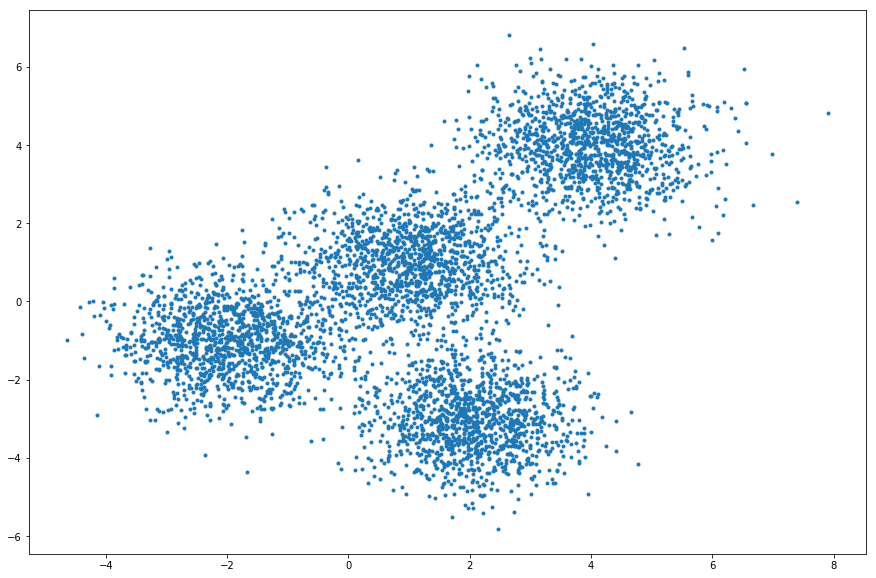

In [4]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [5]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 3, 0, ..., 1, 3, 0], dtype=int32)

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.03678145,  1.00625747],
       [ 2.03871827, -3.04244627],
       [-1.97970436, -1.00677713],
       [ 3.9824936 ,  3.99865001]])

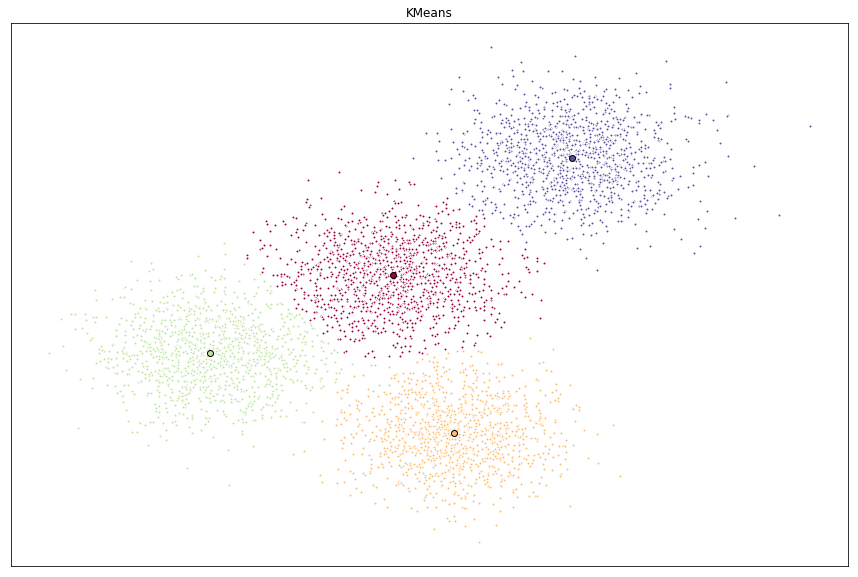

In [9]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

## 2. Using *k*-means for Customer Segmentation

In [10]:
!wget -q -O 'customer_segmentation.csv' https://cocl.us/customer_dataset
print('Data downloaded!')

Data downloaded!


In [12]:
customers_df = pd.read_csv('customer_segmentation.csv')
customers_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [13]:
df = customers_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [14]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [15]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 1 0 2 1 1 2 2 2 1 0 2 2 2 0 2 2 2 1 2 2 2 0 1 1 2 2 2 2 2 2 1 0 2 2 2 0
 0 2 1 0 1 2 1 2 1 2 2 2 2 1 1 0 2 0 0 0 2 2 2 1 2 1 1 2 2 2 0 2 0 2 2 2 2
 2 2 2 2 1 2 2 0 1 2 1 2 2 2 0 0 2 2 0 0 2 2 2 2 0 2 0 1 2 0 0 1 2 2 2 2 2
 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 1 2 2 0
 2 2 2 1 0 2 2 2 2 1 0 0 2 1 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 2 0 1 0 2 2 1 0
 1 2 2 2 2 2 1 2 0 2 2 2 1 1 2 1 2 0 2 2 0 2 1 2 0 2 2 2 2 2 0 0 1 2 2 0 1
 2 2 2 2 1 2 2 0 2 2 2 2 1 2 2 0 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 1 0 2 0 2
 2 2 1 2 0 1 0 2 1 2 2 0 2 2 2 2 0 0 0 2 2 2 1 2 2 1 2 1 2 2 1 2 2 2 0 2 2
 0 2 0 1 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 0 2 0 1 2 0 2 2 2 0 0 2 2 2 1 0
 2 2 0 2 1 2 2 2 2 2 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 0 2 0 2 2 2 1 1 2
 0 2 1 0 0 2 2 2 0 2 2 2 2 2 1 2 1 2 2 2 2 0 2 0 2 2 2 1 2 2 2 2 0 2 2 0 0
 1 2 2 2 2 2 0 0 2 1 0 1 2 2 0 2 2 1 1 2 0 2 2 1 2 0 2 1 2 2 2 1 2 2 2 2 1
 2 0 2 2 2 2 1 0 2 2 1 2 0 2 2 1 2 1 2 2 2 2 2 2 2 1 1 2 2 1 2 0 2 2 2 0 2
 0 2 2 2 2 2 1 0 0 2 1 2 

In [16]:
df["Labels"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [17]:
df.groupby('Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
